#NLP Assignment 1
Author: Ali Shiraee Kasmaee

## Problem 1

In this section, I will show how we can create word vectors with word2vec, how to use them, compare vectors trained on different corpora and finally plot some of the vectors using visualization techniques and analyze the formation of clusters.

In [1]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import common_texts
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

We can train the word2vec model on any arbitrary corpus. For example, here I have used a sample corpus from test utils of the ***Gensim*** library. As you can see, when I print it out, I will get a list of sentences.

In [2]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

We can use Gensim to train a Word2Vec model. The code below shows how we can train the algorithm on `common_texts` to generate 100-dimensional vectors for the words present in our corpus. The algorithm considers windows of size 5 as the context around a word and ignores any word that appears less than 2 times.

In [3]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=2, workers=4)

We can access the word vectors through the `model.vw`:

In [4]:
model.wv["trees"]

array([ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, -1.3754654e-03,
        7.6685809e-03,  7.3464094e-03, -3.6732971e-03,  2.6427018e-03,
       -8.3171297e-03,  6.2054861e-03, -4.6373224e-03, -3.1641065e-03,
        9.3113566e-03,  8.7338570e-04,  7.4907029e-03, -6.0740625e-03,
        5.1605068e-03,  9.9228229e-03, -8.4573915e-03, -5.1356913e-03,
       -7.0648370e-03, -4.8626517e-03, -3.7785638e-03, -8.5361991e-03,
        7.9556061e-03, -4.8439382e-03,  8.4236134e-03,  5.2625705e-03,
       -6.5500261e-03,  3.9578713e-03,  5.4701497e-03, -7.4265362e-03,
       -7.4057197e-03, -2.4752307e-03, -8.6257253e-03, -1.5815723e-03,
       -4.0343284e-04,  3.2996845e-03,  1.4418805e-03, -8.8142155e-04,
       -5.5940580e-03,  1.7303658e-03, -8.9737179e-04,  6.7936908e-03,
        3.9735902e-03,  4.5294715e-03,  1.4343059e-03, -2.6998555e-03,
       -4.3668128e-03, -1.0320747e-03,  1.4370275e-03, -2.6460087e-03,
       -7.0737829e-03, -7.8053069e-03, -9.1217868e-03, -5.9351693e-03,
      

To find the words that are most similar to a given word, we can use the `most_similar` function. This function calculates the similarity between words using Cosine Similarity. It does this by comparing the query word vector to all the other words in the vocabulary, and then returning the words with the highest similarity scores.


In [5]:
model.wv.most_similar('trees', topn=5)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922)]

As we can see from the above, the quality of the word vectors is not satisfactory. This is because the model is only trained on a small set of words. To work with some better word vectors, I will use some pre-trained models for the rest of this section. However, if we plan to train our own word2vec model, the process is relatively simple. We need to collect a large dataset of sentences/words, clean them and use Gensim to train a word2vec model.


The [Text8](https://cs.fit.edu/%7Emmahoney/compression/textdata.html) dataset is a simplified version of the English Wikipedia dump, which has been preprocessed and formatted as a single continuous line of text. Let's load it with Gensim.

In [6]:
corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


The Google News dataset is a large corpus of news articles collected by Google, which is often used in natural language processing and machine learning research. It provides a diverse range of topics and writing styles. ([Source](https://code.google.com/archive/p/word2vec/))

In [7]:
!gdown https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=a136d135-1d70-418f-84bd-4323bb3c6406
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:17<00:00, 95.4MB/s]


Now, let's create two distinct Word2Vec models, one from the Text8 corpus and the other from Google News. The latter has vectors with higher dimensionality, is trained on a much larger text corpus and covers a broader vocabulary. So, the word vectors in the second one are expected to have a better quality.

In [8]:
text8_model = Word2Vec(corpus)
googlenews_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                                     binary=True)

In [9]:
print(f'Text8 vector size is {text8_model.vector_size}.')
print(f'GoogleNews vector size is {googlenews_model.vector_size}.')

Text8 vector size is 100.
GoogleNews vector size is 300.


In [10]:
print(f'Text8 vocabulary size is {len(text8_model.wv.key_to_index)} words.')
print(f'GoogleNews vocabulary size is {len(googlenews_model.key_to_index)} words.')


Text8 vocabulary size is 71290 words.
GoogleNews vocabulary size is 3000000 words.


To compare the quality of two models, one intuitive way is to check the most similar words to a given word. Although this is not a quantitative method, it can still be useful. For instance, if we compare the most similar words to the word "evil" in the two models, the Google News model provides more relevant and negative words, such as "evil" itself.


In [11]:
text8_model.wv.most_similar('evil')

[('eternal', 0.7340453267097473),
 ('hell', 0.7149778008460999),
 ('god', 0.7005068063735962),
 ('humanity', 0.6955623030662537),
 ('spirit', 0.6873981356620789),
 ('mortal', 0.6780468225479126),
 ('satan', 0.6777222156524658),
 ('goodness', 0.6712394952774048),
 ('wrath', 0.6669423580169678),
 ('afterlife', 0.6628866195678711)]

In [12]:
googlenews_model.most_similar('evil')

[('malevolent', 0.6452558040618896),
 ('wickedness', 0.6335453987121582),
 ('evil_doers', 0.633001446723938),
 ('demonic', 0.6305655241012573),
 ('villainous', 0.6281781196594238),
 ('Evil', 0.6114223599433899),
 ('evil_incarnate', 0.6066018342971802),
 ('satanic', 0.599364161491394),
 ('satan', 0.5928500890731812),
 ('evilness', 0.5911288857460022)]

In [13]:
text8_model.wv.most_similar('joy')

[('donald', 0.6293591260910034),
 ('lerner', 0.6280136704444885),
 ('mister', 0.6233335137367249),
 ('mama', 0.6106157898902893),
 ('karen', 0.6016175746917725),
 ('jerry', 0.5984110832214355),
 ('kid', 0.5939953923225403),
 ('larry', 0.593268632888794),
 ('courtney', 0.5907301902770996),
 ('casey', 0.5844271183013916)]

In [14]:
googlenews_model.most_similar('joy')

[('sheer_joy', 0.7729966640472412),
 ('exhilaration', 0.6803831458091736),
 ('elation', 0.6732935309410095),
 ('unbridled_joy', 0.6709332466125488),
 ('joyful', 0.6633967757225037),
 ('delight', 0.6550244688987732),
 ('excitement', 0.6531195044517517),
 ('joyousness', 0.6315581798553467),
 ('thrill', 0.6302037239074707),
 ('happiness', 0.6182845830917358)]

To visualize word vectors in a 2D space, one method is to reduce the dimensions of all the word vectors and plot them all together. However, this approach may not provide sufficient information due to the high density of the points, particularly with a larger vocabulary of 3 million words. Also, that way we cannot compare the two modesl because one has much less words in its vocabulary.

One effective way to visualize words is to begin by selecting a set of words, reducing the dimensionality of their associated vectors, and visualizing them on a plot. To accomplish this, I will create a function that takes in a set of words and the word2vec model. I will use this function to visualize different subsets of words for each model. Please note that in the following text, there is a variable called "perplexity" which represents the number of nearest neighbors. For my purposes, I have set it to 5 since most of the clusters that I am going to define have approximately this number of elements.


In [15]:
def plot_subset(subset, word_vectors, perplexity=5, seed=42):
  selected_vectors = []
  for word in subset:
    selected_vectors.append(word_vectors[word])

  tsne_model = TSNE(n_components=2, perplexity=perplexity, random_state=seed)
  reduced_vectors = tsne_model.fit_transform(np.array(selected_vectors))

  plt.figure(figsize=(10, 10))
  for i, word in enumerate(subset):
      plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
      plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')
  plt.show()

First, let's check it for a simple example to see how these models mimic the sexual shifts. As you can see, the result of the model trained on GoogleNews is more understandable. The vector that maps man to woman, seem to map actor to actress as well, but in the other model, the formation of points seem somehow random in the plane.

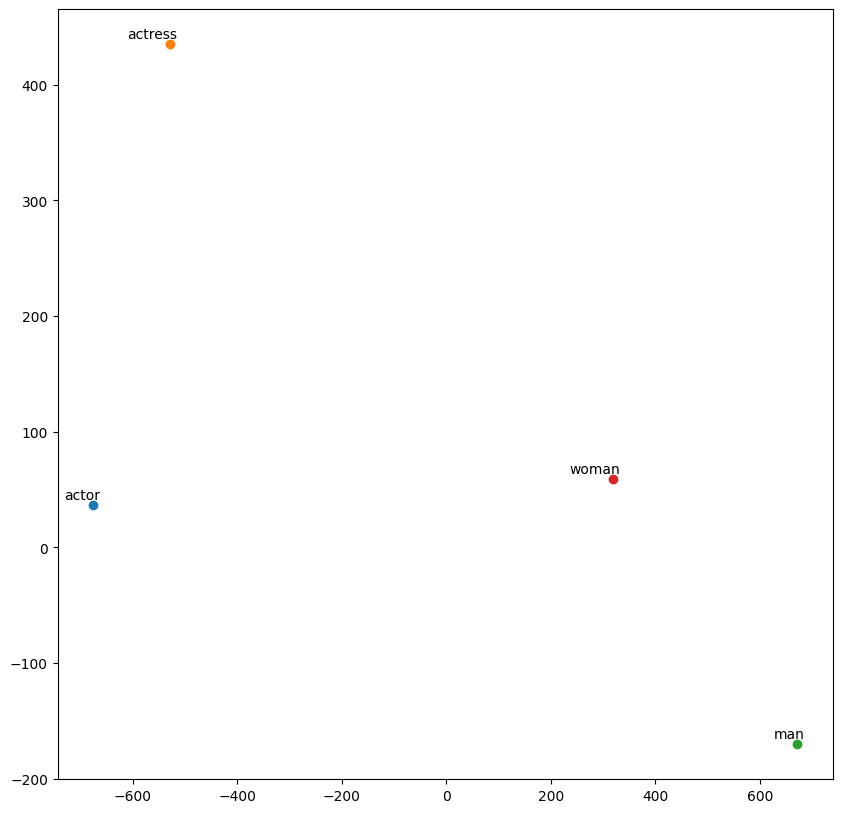

In [16]:
plot_subset(["actor", "actress", "man", "woman"], text8_model.wv, perplexity=2)

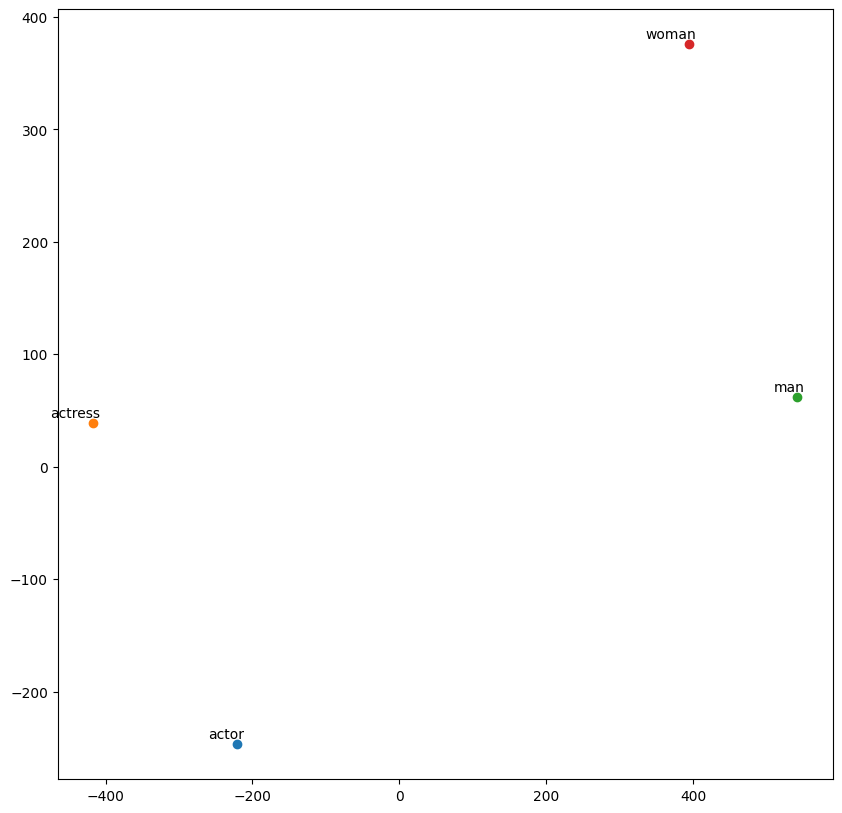

In [17]:
plot_subset(["actor", "actress", "man", "woman"], googlenews_model, perplexity=2)

I have defined a list of words belonging to different categories. My next step is to execute the above function that will visualize these words in a 2D plane. In an ideal word2vec model, words with similar meanings should be positioned closer to each other. By calling this function with the list bellow and two models, I can observe that in the Google News model, the relevant words are more closely grouped together, and the words are less dispersed across irrelevant clusters.


In [18]:
categories = [
    'doctor', 'engineer', 'teacher', 'lawyer', 'chef', 'artist',
    'canada', 'china', 'india', 'germany', 'brazil', 'russia',
    'dog', 'cat', 'elephant', 'tiger', 'bear', 'wolf',
]

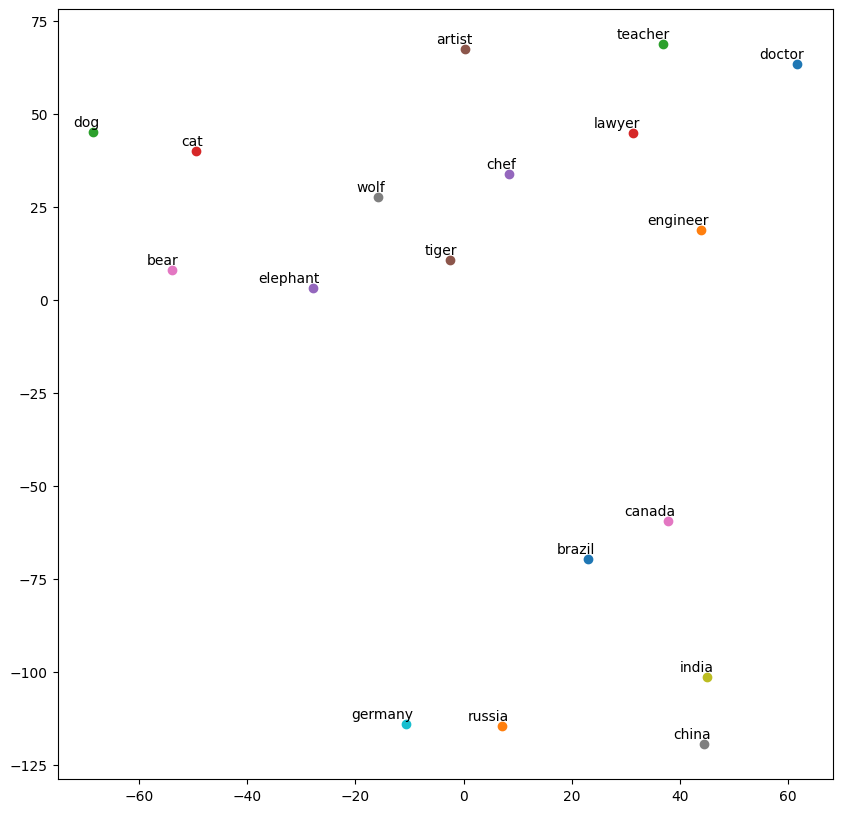

In [19]:
plot_subset(categories, text8_model.wv)

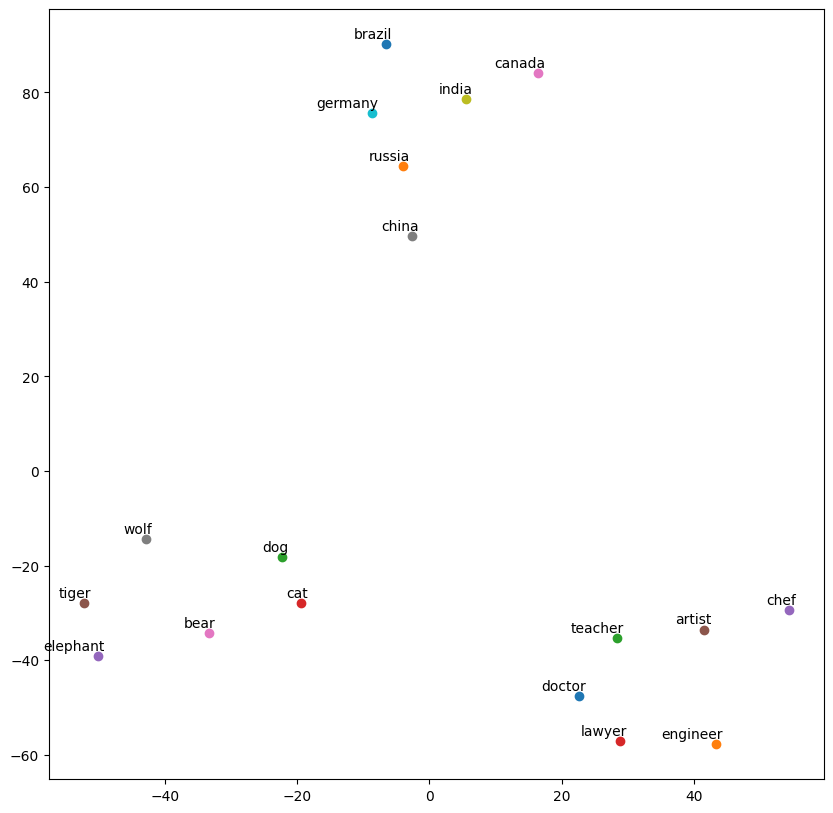

In [20]:
plot_subset(categories, googlenews_model)

Now, let's check whether any of the models are able to tell the difference between different types of words (nouns, verbs, adjectives). We can see that altough it is hard a little bit harder for these models to capture these relationtips, but still the Google News model seem to perform better, again!

In [21]:
types = [
          'computer', 'internet', 'algorithm', 'software', 'hardware',
          'walk', 'run', 'ride', 'drive', 'dance',
          'big', 'small', 'massive', 'tiny', 'huge'
]

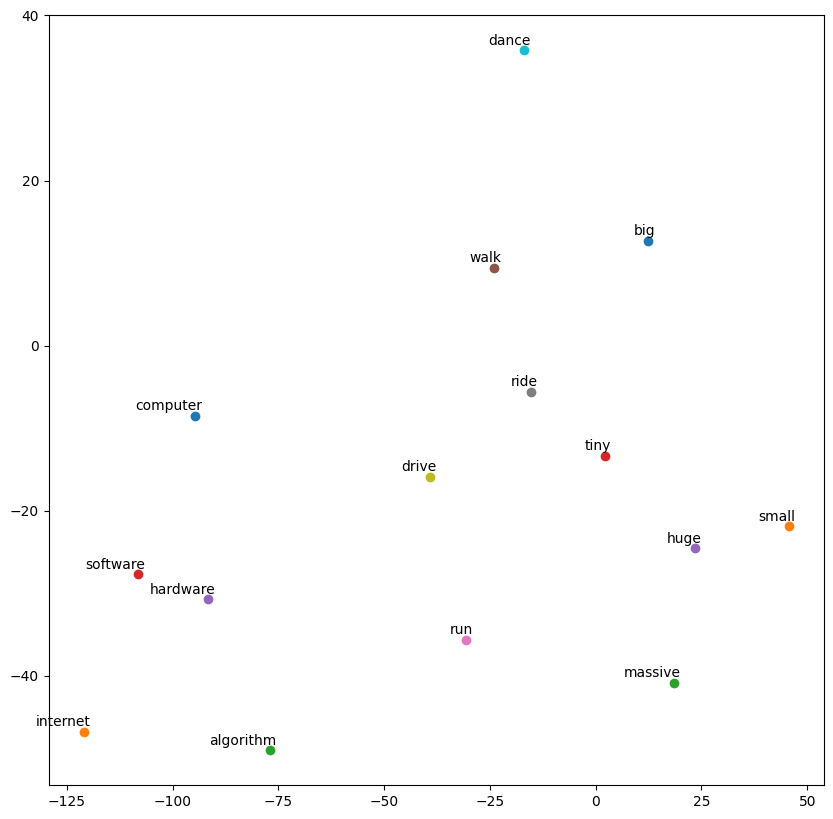

In [22]:
plot_subset(types, text8_model.wv)

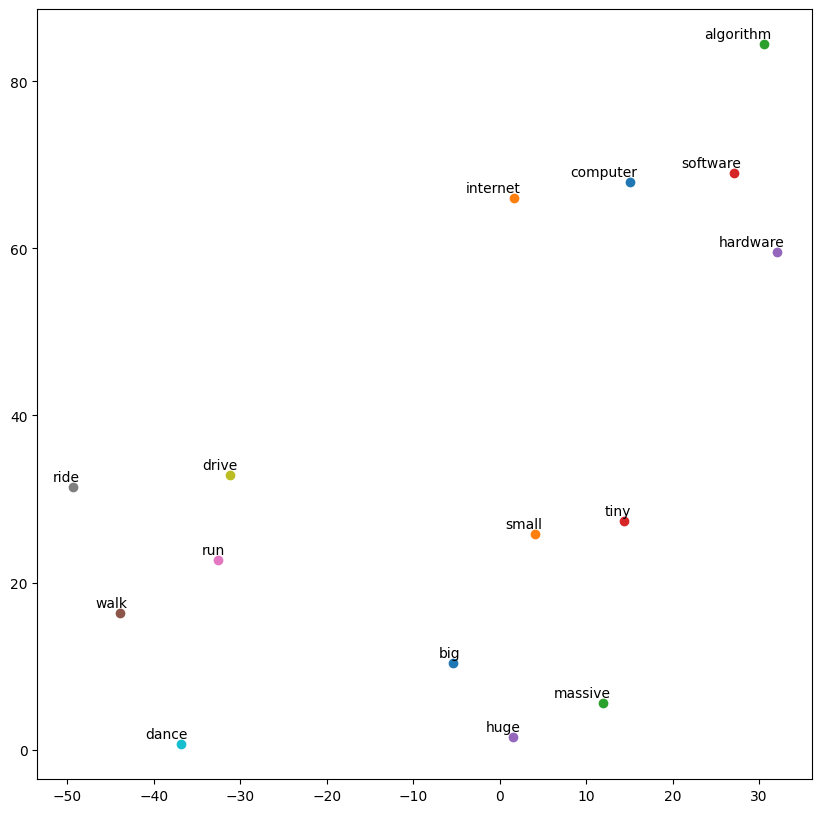

In [23]:
plot_subset(types, googlenews_model)

## Problem 2

In this section, we are going to work with GloVe. First, I will download the pretrained model from their [official website](https://nlp.stanford.edu/projects/glove/). When we downlod and extract it, we will see several text files which are the vector reperesentations in different dimensions (50, 100, 200, 300) which are structured as follows:

```txt
word1 0.123 0.134 0.532 0.152
word2 0.934 0.412 0.532 0.159
word3 0.334 0.241 0.324 0.188
...
word9 0.334 0.241 0.324 0.188
```

In [24]:
! wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-02-07 00:40:53--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-07 00:40:54--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-02-07 00:43:33 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [25]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


To convert these files to a format that we can work with in python, we have two options. There are two ways to do this. Firstly, we can write a code to read the text file line-by-line, parse each word and its corresponding vector, and save them in a dictionary. However, this method can be time-consuming, so it's better to use Gensim. Gensim allows us to load them as a `KeyedVectors` object, which gives us access to useful functions like `most_similar` (which we need for our analogy analysis). It's important to note that although we load these GloVe pretrained vectors into a word2vec format, the underlying vector representations remain the same and are still those learned with GloVe. To have a fair comparision between word2vec and GloVe in the next section, I will load the 300 dimensional version.

In [26]:
glove_model = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False, no_header=True)

In [27]:
print(f'GloVe vector size is {len(glove_model.key_to_index)}.')

GloVe vector size is 400000.


In [28]:
glove_model.most_similar('evil')

[('malevolent', 0.5538987517356873),
 ('wicked', 0.5457929968833923),
 ('villain', 0.5456534624099731),
 ('demonic', 0.5355545282363892),
 ('sinister', 0.5316072702407837),
 ('demons', 0.5272329449653625),
 ('villains', 0.5188359022140503),
 ('beings', 0.5187814831733704),
 ('enemies', 0.5149116516113281),
 ('minions', 0.5092962980270386)]

Word analogies in word vectors refer to the property that certain semantic relationships between words can be captured by simple vector arithmetic in the embedding space. This is often demonstrated with the famous example: `king - man + woman ≈ queen`. This equation is same as the sentence "king is to man as queen is to woman". The idea here is that the difference between `king` and `man` vectors is the same as between `queen` and `woman`. We can check an analogy with `most_similar`function like this.


In [29]:
glove_model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)

[('queen', 0.6713277101516724)]

In [30]:
def do_analogy(model, pos_a, pos_b, neg):
    return model.most_similar(positive=[pos_a, pos_b], negative=neg, topn=1)[0][0]

For example, lets say we have a vector for `uncle` and we want to change it in a way to end up with the word `aunt`. We can do so by first calculating a vector that can shift gender from male to female, and then add this vector to the vector representaion of the `uncle`. In a nutshell, we are calculating `(woman - man) + uncle`

In [31]:
do_analogy(glove_model, "woman", "uncle", "man")

'aunt'

In [32]:
do_analogy(glove_model, "woman", "actor", "man")

'actress'

Suprisingly, the learned representation can perform this analogy task and I beleive it is done based on the political lanscapes of Texas and Alberta, which is a leaning towards being conservative!

In [33]:
do_analogy(glove_model, "texas", "canada", "us")

'alberta'

We can do it with languages and capitals

In [34]:
do_analogy(glove_model, "french", "england", "france")

'english'

In [35]:
do_analogy(glove_model, "berlin", "england", "germany")

'london'

In [36]:
do_analogy(glove_model, "france", "washington", "paris")

'states'

It also holds for verbs, plurals and opposites

In [37]:
do_analogy(glove_model, "walked", "go", "walk")

'went'

In [38]:
do_analogy(glove_model, "mice", "child", "mouse")

'children'

In [39]:
do_analogy(glove_model, "dark", "low", "light")

'high'

It's worth noting that this property doesn't always hold true. This could be due to limited context for certain words in the corpus.


In [40]:
do_analogy(glove_model, "mandarin", "iran", "china") # True

'farsi'

In [41]:
do_analogy(glove_model, "dutch", "iran", "germany") # False

'iranian'

## Problem 3

In this secion, I will compare the two embedding methods to find out which one performs better. In this section, I will compare GloVe with Google News Word2vec, since they both have a same-size embedding space.

### Visualization
The first evaluation approach that comes to mind is to visualize some word groups for GloVe and compare the results with the findings of first problem.

A good clustering has the following properties:
- Intra-cluster similarity is high
- Inter-cluster similarity is low.

Based on this metric, we can say that for the both lists (`categories` and `types`), the word2vec embedding results in a better clustering. Something to keep in mind here is we can repeat this process with an unlimited group of words and then decide, but we cannot, so this exaluation is not exhaustive.

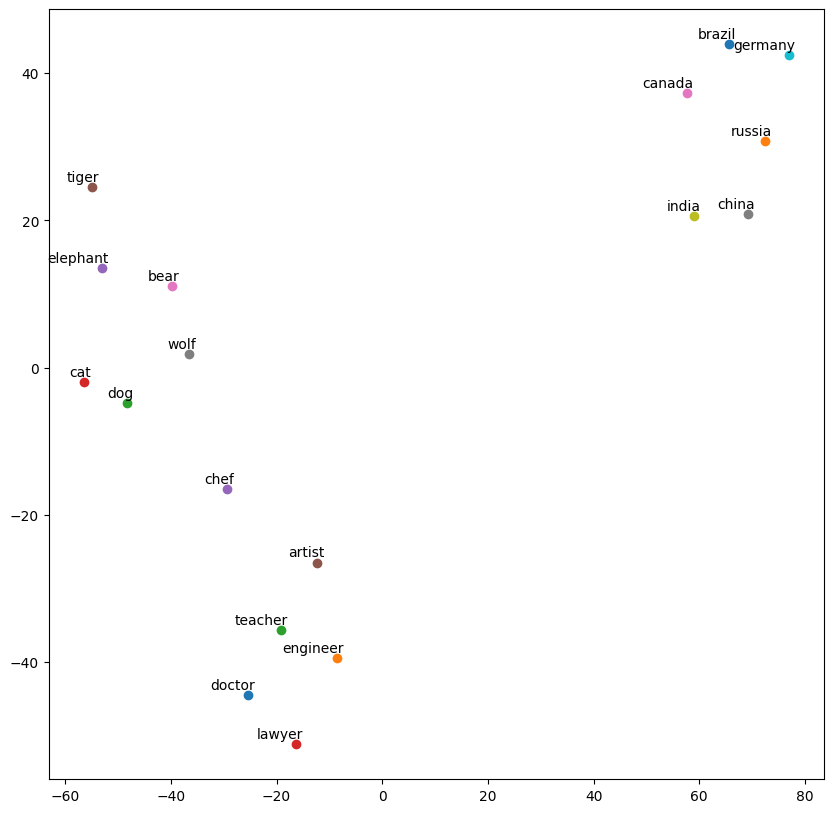

In [42]:
plot_subset(categories, glove_model)

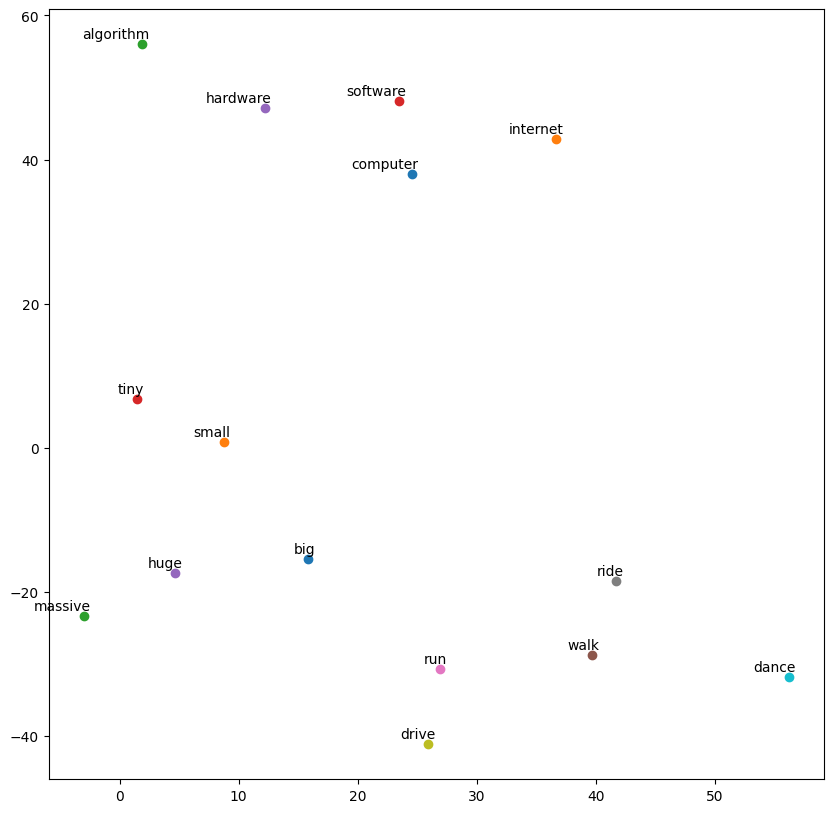

In [43]:
plot_subset(types, glove_model)

### Analogy
We can repeat the analogy task that was done in problem 2 here to check whether the Word2vec model is able to keep up with the GloVe or not. We can see that in this metric, the word2vec cannot keep up with the GloVe, despite the fact that it has a 87% larger vocabulary (3000K vs 400K) and is trained on a much bigger dataset (100B vs 4.5B words). But other metrics are involved in this outcome as well, the most important being the model difference. GloVe is based on matrix factorization techniques on the word-word co-occurrence matrix, which could capture the semantic meanings of words better. Word2Vec, on the other hand, uses context window and does not directly count the co-occurrences, which might make it less effective at capturing certain types of semantic relationships.

In [44]:
print(do_analogy(googlenews_model, "woman", "king", "man"))
print(do_analogy(googlenews_model, "woman", "uncle", "man"))
print(do_analogy(googlenews_model, "woman", "actor", "man"))
print(do_analogy(googlenews_model, "texas", "canada", "us")) # False
print(do_analogy(googlenews_model, "french", "england", "france"))
print(do_analogy(googlenews_model, "berlin", "england", "germany")) # False
print(do_analogy(googlenews_model, "france", "washington", "paris"))
print(do_analogy(googlenews_model, "walked", "go", "walk"))
print(do_analogy(googlenews_model, "mice", "child", "mouse"))
print(do_analogy(googlenews_model, "dark", "low", "light"))
print(do_analogy(googlenews_model, "mandarin", "iran", "china")) # False
print(do_analogy(googlenews_model, "dutch", "iran", "germany")) # False

queen
aunt
actress
canadian
british
liverpool
america
went
children
high
iranian
omar


In [47]:
word_pairs = [
    ('happy', 'joyful'),
    ('sad', 'unhappy'),
    ('big', 'large'),
    ('small', 'tiny'),
    ('fast', 'quick'),
    ('slow', 'sluggish'),
    ('easy', 'simple'),
    ('hard', 'difficult'),
    ('dark', 'dim'),
    ('ocean', 'sea'),
]

Another way that we can compare two word embeddings is to quantitatively compare the similarity of a group of word pairs that have very close meanings to see how closely the models capture the semantic relationship between words. Here I have used cosine similarity which is a common similarity metric to compare two word vectors:
$$
\text{Cosine Similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

In [48]:
def calculate_and_plot_similarities(word_pairs, models, model_names):
    similarities = {model_name: [] for model_name in model_names}

    for word1, word2 in word_pairs:
        for model, model_name in zip(models, model_names):
            similarity = np.dot(model[word1], model[word2]) / (np.linalg.norm(model[word1]) * np.linalg.norm(model[word2]))
            similarities[model_name].append(similarity)

    n_groups = len(word_pairs)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.4
    opacity = 0.8

    for i, model_name in enumerate(model_names):
        plt.bar(index + i*bar_width, similarities[model_name], bar_width,
                alpha=opacity,
                label=model_name)

    plt.xlabel('word pairs')
    plt.ylabel('cosine similarity')
    plt.title('cosine similarity by word pair')
    plt.xticks(index + bar_width / len(models), [f'{wp[0]}\n{wp[1]}' for wp in word_pairs])
    plt.legend()

    plt.tight_layout()
    plt.show()

Here, we can see that overall, although this particular Word2Vec model is trained on a larger corpus and has more words as vocabulary, GloVe performs better in this task, meaning that the selected set of word pairs that have very close meanings are closer to each other in the GloVe's vector space. We should keep in mind that the this evaluation is not general, because we just used a limited set of word pairs to compare.

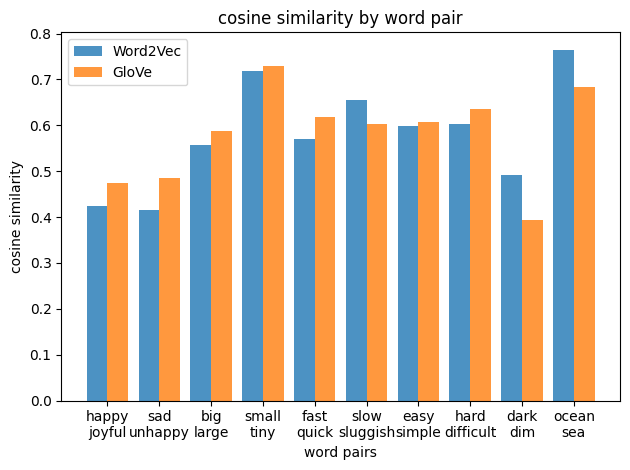

In [49]:
calculate_and_plot_similarities(word_pairs, [googlenews_model, glove_model], ['Word2Vec', 'GloVe'])